Ваприант 21

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [152]:
data = pd.read_excel('./data7/Семинар 7.xlsx', sheet_name=21,names=['num', 'x', 'y']).drop('num', axis=1).dropna()

<Axes: xlabel='x', ylabel='y'>

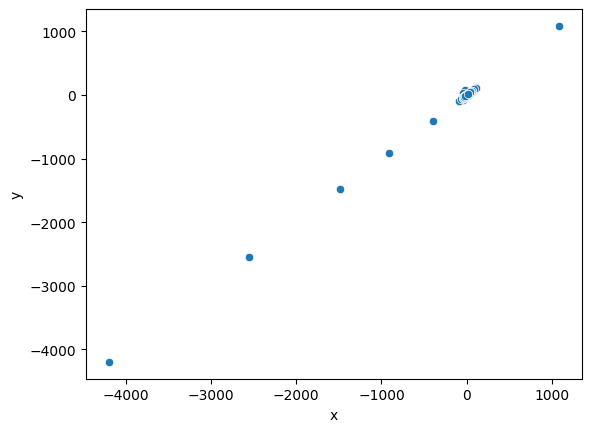

In [153]:
sns.scatterplot(x=data['x'], y=data['y'])

In [154]:
x_arr = data['x'].to_numpy()
y_arr = data['y'].to_numpy()
X_q_025 = np.quantile(x_arr, 0.25)
X_q_075 = np.quantile(x_arr, 0.75)
X_iqd = X_q_075-X_q_025
X_upper_threshold = X_q_075+1.5*X_iqd
X_lower_threshold = X_q_025-1.5*X_iqd

Y_q_025 = np.quantile(y_arr, 0.25)
Y_q_075 = np.quantile(y_arr, 0.75)
Y_iqd = Y_q_075-Y_q_025
Y_upper_threshold = Y_q_075+1.5*Y_iqd
Y_lower_threshold = Y_q_025-1.5*Y_iqd

# выбросы с выводом координат
index = 0
print('i\t\tx\t\ty')
for i, j in zip(data['x'], data['y']):
    if  not ( (i <= X_upper_threshold) & (i >= X_lower_threshold) &
            (j <= Y_upper_threshold) & (j >= Y_lower_threshold) ):
        print(index, '\t', i, j)
    index += 1
        
data_clean =  data.loc[ (data['x'] <= X_upper_threshold) & (data['x'] >= X_lower_threshold) &
                        (data['y'] <= Y_upper_threshold) & (data['y'] >= Y_lower_threshold) ]
data = data_clean

i		x		y
238 	 -90.9120982470928 -90.4152579904169
340 	 79.6935730105974 81.547395559753
372 	 -2558.39509557996 -2552.60083920096
413 	 82.1119541234624 82.7502117069639
427 	 -400.02818606182 -402.035049189552
456 	 -909.463043906636 -906.741226242572
526 	 -1482.76452177621 -1482.50216658403
611 	 83.773126461532 83.2373530231952
665 	 102.902800148547 102.930690554611
829 	 87.7559928257541 88.1311778263268
851 	 -91.714190657829 -91.6278210297316
876 	 1087.37095201405 1087.36482145721
880 	 -4198.93548932304 -4199.39198045601


<Axes: xlabel='PC1', ylabel='PC2'>

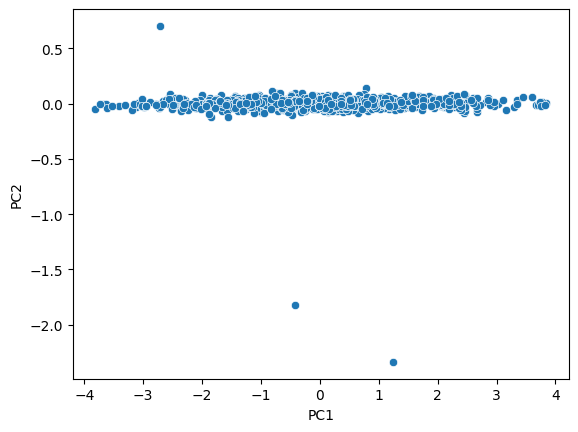

In [155]:
scaler = StandardScaler()
scaler.fit(data.astype('float64'))
scaled_data = scaler.transform(data.astype('float64'))
scaled_df = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

mean_vector = np.mean(scaled_df.values, axis=0)
cov_matrix = (scaled_df - mean_vector).T.dot((scaled_df - mean_vector) / (scaled_df.shape[0] - 1))

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
pca_model = PCA().fit(X=scaled_df)
pca_scores = pd.DataFrame(pca_model.transform(scaled_df)[:, :2], columns=['PC1', 'PC2'])

sns.scatterplot(x=pca_scores['PC1'], y=pca_scores['PC2'])

<Axes: xlabel='x', ylabel='y'>

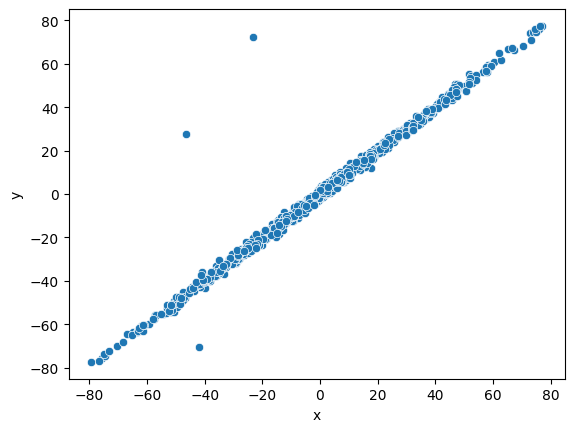

In [156]:
sns.scatterplot(x=data['x'], y=data['y'])

In [157]:
mean_x = round(data['x'].mean(), 4)
mean_y = round(data['y'].mean(), 4)
std_x = round(data['x'].std(), 4)
std_y = round(data['y'].std(), 4)
pearson_corr, pearson_p = stats.pearsonr(data['x'], data['y'])
spearman_corr, spearman_p = stats.spearmanr(data['x'], data['y'])

print(f'Среднее x = {mean_x}, Среднее y = {mean_y}')
print(f'Стандартное отклонение x = {std_x}, Стандартное отклонение y = {std_y}')
print(f'Коэффициент корреляции Пирсона = {pearson_corr}, p-значение = {pearson_p}')
print(f'Коэффициент корреляции Спирмена = {spearman_corr}, p-значение = {spearman_p}')

Среднее x = -1.0339, Среднее y = -0.8481
Стандартное отклонение x = 28.7005, Стандартное отклонение y = 28.8302
Коэффициент корреляции Пирсона = 0.9893679929004149, p-значение = 0.0
Коэффициент корреляции Спирмена = 0.9912735873012439, p-значение = 0.0
